In [1]:
from __future__ import division
from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.display import SVG
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sympy as sp
sf = sp.sympify

import scipy.constants as cm
import pint as pn
ureg = pn.UnitRegistry(system='mks')
ureg.default_format = '~P'
pe = ureg.parse_expression

## Konstanten und Einheiten
CM = pd.DataFrame(cm.physical_constants).T
CM['c'] = CM.index
CM = CM.reset_index(drop=True)
def getpc(quant):
    DF = CM
    DF = DF[DF['c']==quant].reset_index(drop=True)
    quan = DF[0][0] * ureg(DF[1][0])
    return quan

# Plotting
def grid(ax,grain=[1,0.1,1,0.1]):
    if grain[0]!= None:
        ax.xaxis.set_major_locator(plt.MultipleLocator(grain[0]))
    if grain[2]!= None:
        ax.yaxis.set_major_locator(plt.MultipleLocator(grain[2]))
    if grain[1]!= None:
        ax.xaxis.set_minor_locator(plt.MultipleLocator(grain[1]))
    if grain[3]!= None:
        ax.yaxis.set_minor_locator(plt.MultipleLocator(grain[3]))
    ax.grid(True,which='both')

In [2]:
g = getpc('standard acceleration of gravity')
m_e = getpc('electron mass')
e = getpc('elementary charge')
c = getpc('speed of light in vacuum')
e0 = getpc('electric constant')
mu0 = getpc('mag. constant')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Quellcode an/aus schalten."></form>''')

# Impulserhaltung

$m_{\mathrm{rot}}=1030$mg

$m_{\mathrm{blau}}=550$mg

In [4]:
from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="material/impuls.mp4" type="video/mp4">
</video>
""")

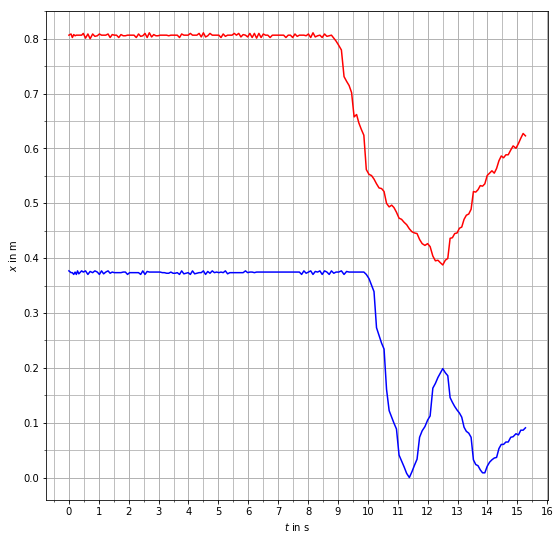

In [5]:
data = pd.read_excel('material/impuls.xlsx', index_col=0)
h=1
v=1
size=1.5
sharex=True
sharey=True
wspace = 0.2
hspace = 0.2
figsize=[6,6]
fig, ax = plt.subplots(v,h,sharey=sharey,sharex=sharex,figsize=tuple(np.array(figsize)*size))
fig.subplots_adjust(wspace = wspace,hspace = wspace)
try: ax = list(ax.flatten())
except: ax = [ax]

ax[0].plot(data.index.get_values(),data['x_rot'].get_values(),'-r')
ax[0].plot(data.index.get_values(),data['x_blau'].get_values(),'-b')
ax[0].set_xlabel('$t$ in s')
ax[0].set_ylabel('$x$ in m')
grid(ax[0],grain=[1,0.5,0.1,0.05])